# Task
Build a complete Google Colab notebook that performs K-Nearest Neighbors (KNN) classification on the Digits dataset from scikit-learn, including data loading, preparation, model training, evaluation (accuracy, confusion matrix, classification report), visualization (optional PCA and misclassified examples), and hyperparameter tuning for 'k'.

## Import libraries

### Subtask:
Import all necessary libraries for data handling, visualization, model building, and evaluation.


**Reasoning**:
Import the necessary libraries for data loading, splitting, scaling, model building, evaluation, dimensionality reduction, and plotting.



In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## Load and explore data

### Subtask:
Load the Digits dataset, understand its structure, and visualize some sample images.


**Reasoning**:
Load the digits dataset, print its shape and description, and visualize some sample images.



Shape of data: (1797, 64)
Shape of target: (1797,)

Dataset Description:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 a

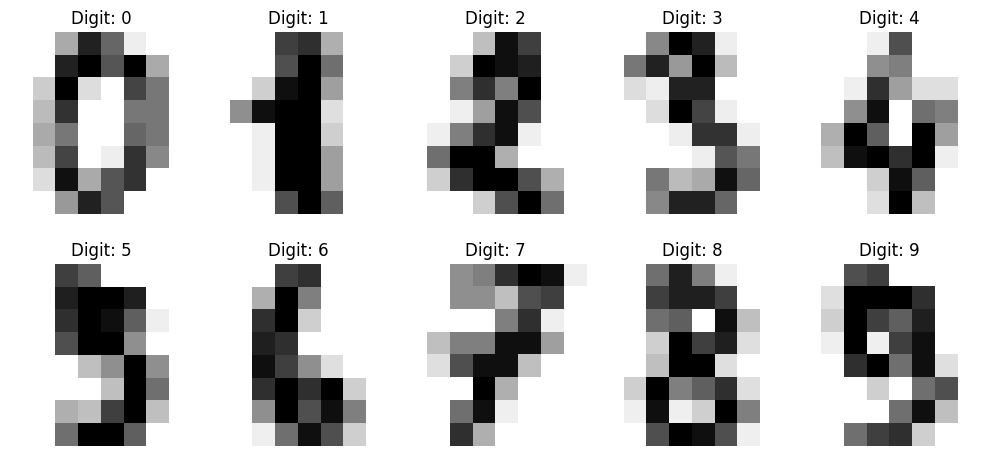

In [2]:
digits = load_digits()

print("Shape of data:", digits.data.shape)
print("Shape of target:", digits.target.shape)
print("\nDataset Description:\n", digits.DESCR)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Prepare data

### Subtask:
Split the data into training and testing sets and scale the features.


**Reasoning**:
Split the data into training and testing sets and scale the features using StandardScaler as requested.



In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of X_train after splitting and scaling:", X_train.shape)
print("Shape of X_test after splitting and scaling:", X_test.shape)
print("Shape of y_train after splitting:", y_train.shape)
print("Shape of y_test after splitting:", y_test.shape)

Shape of X_train after splitting and scaling: (1437, 64)
Shape of X_test after splitting and scaling: (360, 64)
Shape of y_train after splitting: (1437,)
Shape of y_test after splitting: (360,)


## Train knn model

### Subtask:
Initialize and train the KNN classifier on the training data.


**Reasoning**:
Initialize a KNeighborsClassifier with a default number of neighbors and train it using the training data.



In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate model performance

### Subtask:
Predict on the test set and evaluate the model using accuracy, confusion matrix, and classification report.


**Reasoning**:
Use the trained KNN model to predict on the test set and then evaluate the predictions using accuracy, confusion matrix, and classification report.



In [5]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Accuracy: 0.975

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  1  1  0  0  1 36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy

## Visualize results (optional)

### Subtask:
Use PCA for dimensionality reduction and visualize predictions or misclassified samples.


**Reasoning**:
Initialize PCA, fit and transform the data, and create scatter plots to visualize the true and predicted labels in the reduced 2D space.



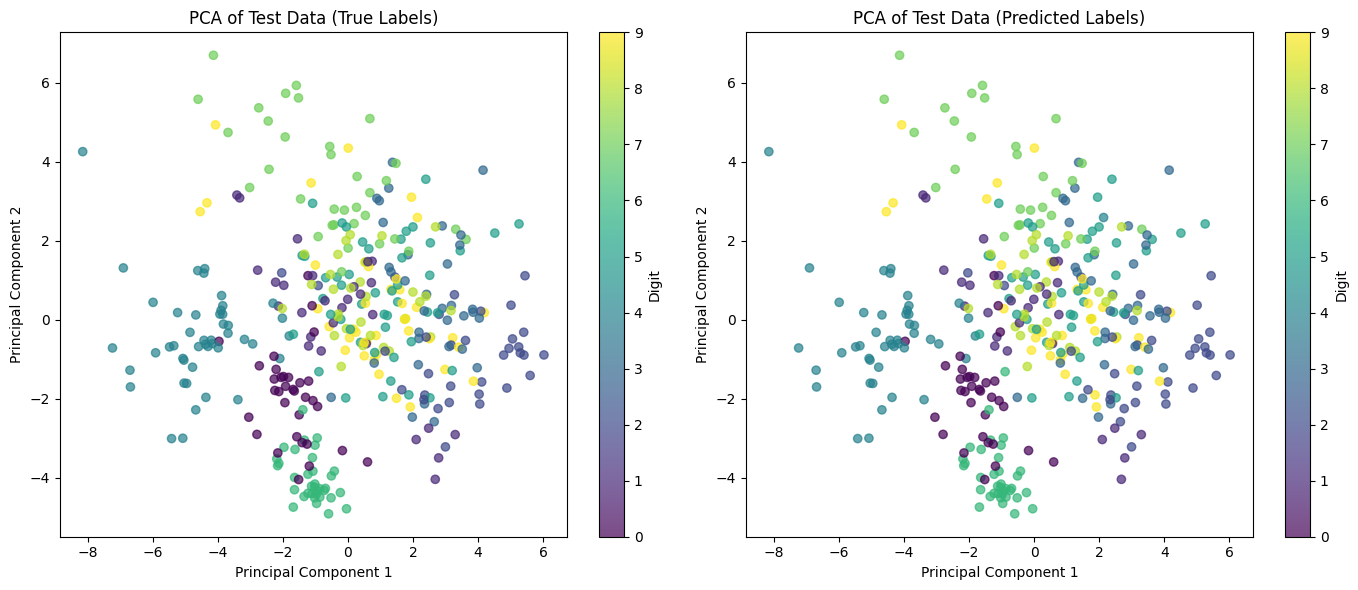

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(14, 6))

# Plot true labels
plt.subplot(1, 2, 1)
scatter_true = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title('PCA of Test Data (True Labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_true, label='Digit')

# Plot predicted labels
plt.subplot(1, 2, 2)
scatter_pred = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.title('PCA of Test Data (Predicted Labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_pred, label='Digit')

plt.tight_layout()
plt.show()

**Reasoning**:
Identify misclassified samples and plot them in the 2D PCA space to visualize where the model made errors.



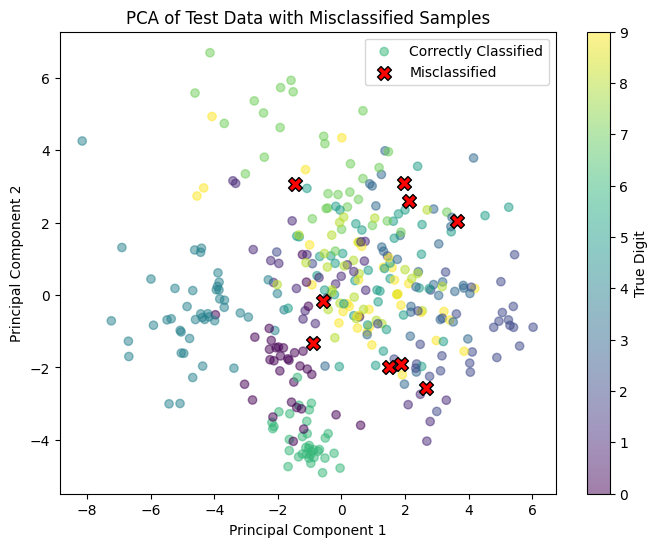

In [7]:
misclassified_indices = np.where(y_test != y_pred)[0]

plt.figure(figsize=(8, 6))
scatter_true = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5, label='Correctly Classified')
plt.scatter(X_test_pca[misclassified_indices, 0], X_test_pca[misclassified_indices, 1],
            c='red', marker='X', s=100, label='Misclassified', edgecolor='k')
plt.title('PCA of Test Data with Misclassified Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter_true, label='True Digit')
plt.legend()
plt.show()

## Tune hyperparameter (k)

### Subtask:
Experiment with different values of `k` to find the optimal number of neighbors for the KNN model.


**Reasoning**:
Experiment with different values of k (n_neighbors) to find the optimal number of neighbors for the KNN model by iterating through a range of k values, training the model for each k, calculating training and testing accuracies, and storing them.



In [8]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

**Reasoning**:
Plot the training and testing accuracies against the number of neighbors (k) to visualize how different k values affect model performance and identify the optimal k.



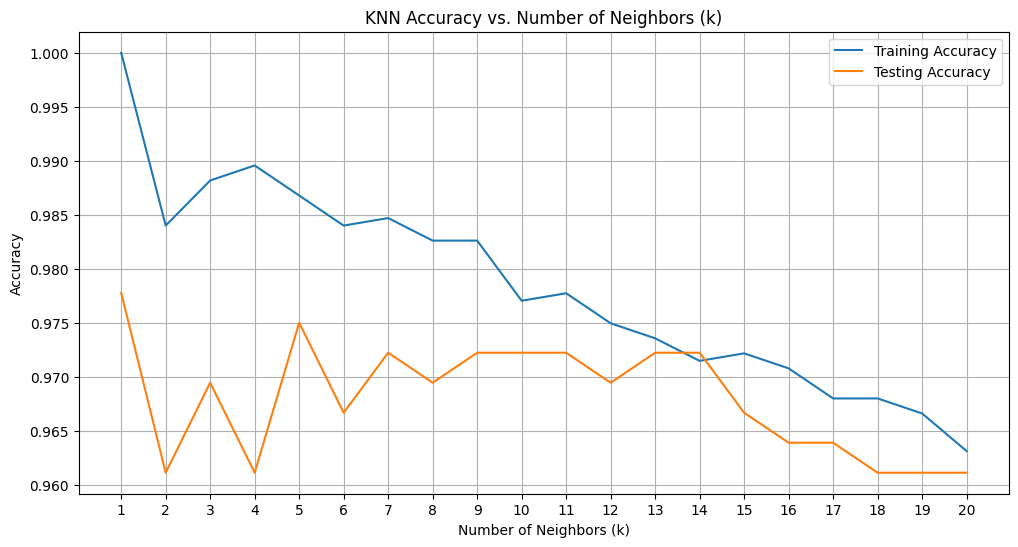

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Digits dataset contains 1797 instances, each with 64 features (representing an 8x8 image).
*   The data was successfully split into training (1437 samples) and testing (360 samples) sets, and features were scaled using `StandardScaler`.
*   The KNN model with the initial `n_neighbors=5` achieved a test accuracy of 0.975.
*   The confusion matrix and classification report indicated high precision, recall, and f1-scores for most digit classes, although minor misclassifications occurred between certain digits.
*   Visualizing the test data in a 2-component PCA space showed distinct clusters for different digits, and misclassified samples were identifiable within this reduced space.
*   Experimenting with `k` values from 1 to 20 showed that testing accuracy generally peaks and then slightly decreases as `k` increases beyond a certain point, while training accuracy decreases with increasing `k`.

### Insights or Next Steps

*   The optimal `k` value appears to be where the testing accuracy is highest before starting to plateau or decrease significantly, suggesting further investigation around the peak of the test accuracy curve.
*   While the current KNN model performs well, exploring other classification algorithms or techniques like cross-validation during hyperparameter tuning could potentially yield further improvements in robustness and performance.
